In [1]:
import pandas as pd

orders = pd.read_csv("olist_orders_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
translations = pd.read_csv("product_category_name_translation.csv")
reviews = pd.read_csv("olist_order_reviews_dataset.csv")
customers = pd.read_csv("olist_customers_dataset.csv")
payments = pd.read_csv("olist_order_payments_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")

In [3]:
df = pd.merge(orders, order_items, on="order_id", how="inner")


In [4]:
df = pd.merge(df, customers[['customer_id', 'customer_state']], on="customer_id", how="left")


In [5]:
df = pd.merge(df, products[['product_id', 'product_category_name']], on="product_id", how="left")
df = pd.merge(df, translations, on="product_category_name", how="left")
df.rename(columns={'product_category_name_english': 'product_category'}, inplace=True)


In [6]:
df = pd.merge(df, payments[['order_id', 'payment_type']], on="order_id", how="left")


In [7]:
df = pd.merge(df, reviews[['order_id', 'review_score']], on="order_id", how="left")


In [8]:
df['is_returned'] = df['review_score'].apply(lambda x: 1 if x <= 2 else 0)


In [9]:
final_df = df[[
    'order_id', 'customer_state', 'product_category', 'payment_type',
    'price', 'freight_value', 'review_score', 'is_returned'
]]


In [10]:
final_df.to_csv("ecommerce_return_dataset.csv", index=False)
print("✅ Merged dataset created successfully!")


✅ Merged dataset created successfully!


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118310 entries, 0 to 118309
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118310 non-null  object 
 1   customer_id                    118310 non-null  object 
 2   order_status                   118310 non-null  object 
 3   order_purchase_timestamp       118310 non-null  object 
 4   order_approved_at              118295 non-null  object 
 5   order_delivered_carrier_date   117056 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  118310 non-null  object 
 8   order_item_id                  118310 non-null  int64  
 9   product_id                     118310 non-null  object 
 10  seller_id                      118310 non-null  object 
 11  shipping_limit_date            118310 non-null  object 
 12  price                         

In [12]:
df.describe()

,order_item_id,price,freight_value,review_score,is_returned
count,118310.000000,118310.000000,118310.000000,117332.000000,118310.000000
mean,1.196543,120.646603,20.032387,4.031390,0.160105
std,0.699489,184.109691,15.836850,1.387994,0.366705
min,1.000000,0.850000,0.000000,1.000000,0.000000
25%,1.000000,39.900000,13.080000,4.000000,0.000000
50%,1.000000,74.900000,16.280000,5.000000,0.000000
75%,1.000000,134.900000,21.180000,5.000000,0.000000
max,21.000000,6735.000000,409.680000,5.000000,1.000000


In [13]:
df.isnull().sum()


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1254
order_delivered_customer_date    2588
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_state                      0
product_category_name            1709
product_category                 1734
payment_type                        3
review_score                      978
is_returned                         0
dtype: int64

In [14]:
df = df.dropna(subset=['review_score', 'product_category', 'payment_type'])


In [15]:
df.isnull().sum()


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date     1195
order_delivered_customer_date    2400
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_state                      0
product_category_name               0
product_category                    0
payment_type                        0
review_score                        0
is_returned                         0
dtype: int64

In [16]:
df = df.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'])


In [17]:
df.isnull().sum()


order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
customer_state                   0
product_category_name            0
product_category                 0
payment_type                     0
review_score                     0
is_returned                      0
dtype: int64

In [18]:
print("Rows left:", len(df))


Rows left: 113194


In [19]:
print(df['product_category'].unique())
print(df['customer_state'].unique())


['housewares' 'perfumery' 'auto' 'pet_shop' 'stationery' 'furniture_decor'
 'office_furniture' 'garden_tools' 'computers_accessories'
 'bed_bath_table' 'toys' 'telephony' 'health_beauty' 'electronics' 'baby'
 'cool_stuff' 'watches_gifts' 'air_conditioning' 'sports_leisure'
 'books_general_interest' 'construction_tools_construction'
 'small_appliances' 'food' 'luggage_accessories' 'fashion_underwear_beach'
 'fashion_bags_accessories' 'musical_instruments'
 'construction_tools_lights' 'books_technical' 'costruction_tools_garden'
 'home_appliances' 'market_place' 'agro_industry_and_commerce'
 'party_supplies' 'home_confort' 'cds_dvds_musicals'
 'industry_commerce_and_business' 'consoles_games' 'furniture_bedroom'
 'construction_tools_safety' 'fixed_telephony' 'drinks'
 'kitchen_dining_laundry_garden_furniture' 'fashion_shoes'
 'home_construction' 'audio' 'home_appliances_2' 'cine_photo'
 'furniture_living_room' 'art' 'fashion_male_clothing'
 'christmas_supplies' 'food_drink' 'tablets_prin

In [21]:
final_df.to_csv("ecommerce_return_dataset.csv", index=False)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118310 entries, 0 to 118309
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          118310 non-null  object 
 1   customer_state    118310 non-null  object 
 2   product_category  116576 non-null  object 
 3   payment_type      118307 non-null  object 
 4   price             118310 non-null  float64
 5   freight_value     118310 non-null  float64
 6   review_score      117332 non-null  float64
 7   is_returned       118310 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 7.2+ MB


In [24]:
df=pd.read_csv("ecommerce_return_dataset.csv")

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118310 entries, 0 to 118309
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          118310 non-null  object 
 1   customer_state    118310 non-null  object 
 2   product_category  116576 non-null  object 
 3   payment_type      118307 non-null  object 
 4   price             118310 non-null  float64
 5   freight_value     118310 non-null  float64
 6   review_score      117332 non-null  float64
 7   is_returned       118310 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 7.2+ MB


In [27]:
df.isnull().sum()

order_id               0
customer_state         0
product_category    1734
payment_type           3
price                  0
freight_value          0
review_score         978
is_returned            0
dtype: int64

In [28]:
df = df.dropna(subset=['product_category', 'review_score'])


In [29]:
df.isnull().sum()

order_id            0
customer_state      0
product_category    0
payment_type        3
price               0
freight_value       0
review_score        0
is_returned         0
dtype: int64

In [30]:
df = df.dropna(subset=['payment_type'])


In [33]:
df.isnull().sum()

order_id            0
customer_state      0
product_category    0
payment_type        0
price               0
freight_value       0
review_score        0
is_returned         0
dtype: int64

In [35]:
final_df.to_csv("ecommerce_ret_dataset.csv", index=False)


In [38]:
df=pd.read_csv("ecommerce_ret_dataset.csv")

In [39]:
df.isnull().sum()

order_id               0
customer_state         0
product_category    1734
payment_type           3
price                  0
freight_value          0
review_score         978
is_returned            0
dtype: int64

In [40]:
df = df.dropna(subset=['product_category', 'review_score','payment_type'])


In [41]:
df.isnull().sum()

order_id            0
customer_state      0
product_category    0
payment_type        0
price               0
freight_value       0
review_score        0
is_returned         0
dtype: int64

In [42]:
final_df = df[[
    'order_id', 'customer_state', 'product_category', 'payment_type',
    'price', 'freight_value', 'review_score', 'is_returned'
]]


In [43]:
final_df.to_csv("ecommerce_clean_dataset.csv", index=False)


In [46]:
df=pd.read_csv("ecommerce_clean_dataset.csv")

In [47]:
df.isnull().sum()

order_id            0
customer_state      0
product_category    0
payment_type        0
price               0
freight_value       0
review_score        0
is_returned         0
dtype: int64

In [48]:
import pandas as pd

df = pd.read_csv("ecommerce_clean_dataset.csv")
df.head()
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          115609 non-null  object 
 1   customer_state    115609 non-null  object 
 2   product_category  115609 non-null  object 
 3   payment_type      115609 non-null  object 
 4   price             115609 non-null  float64
 5   freight_value     115609 non-null  float64
 6   review_score      115609 non-null  float64
 7   is_returned       115609 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 7.1+ MB


order_id            0
customer_state      0
product_category    0
payment_type        0
price               0
freight_value       0
review_score        0
is_returned         0
dtype: int64

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt


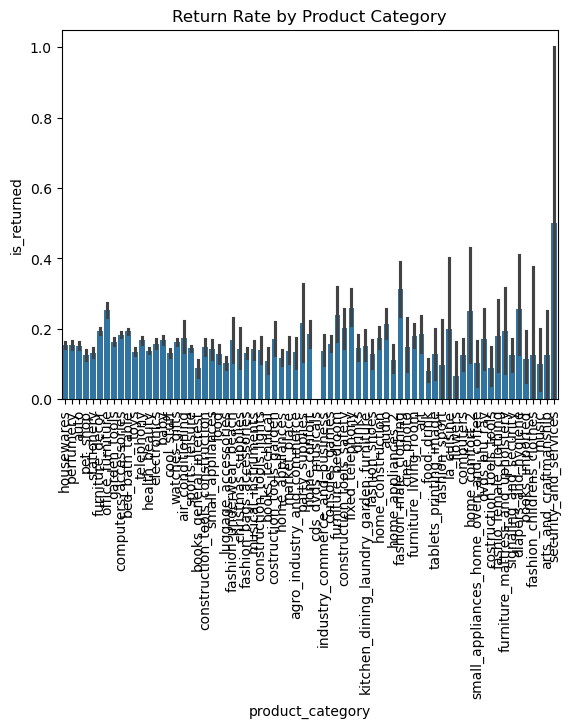

In [50]:
sns.barplot(x='product_category', y='is_returned', data=df)
plt.xticks(rotation=90)
plt.title("Return Rate by Product Category")
plt.show()


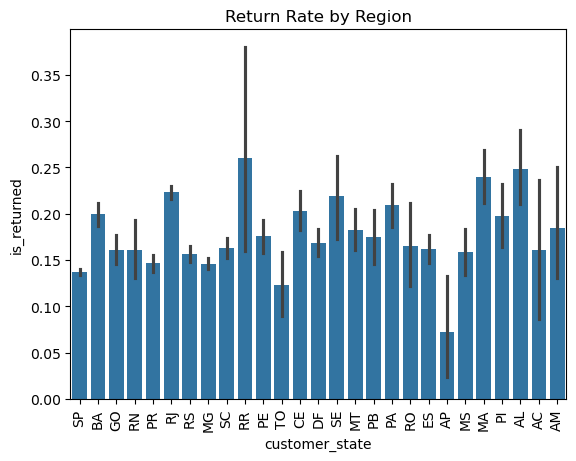

In [51]:
sns.barplot(x='customer_state', y='is_returned', data=df)
plt.xticks(rotation=90)
plt.title("Return Rate by Region")
plt.show()


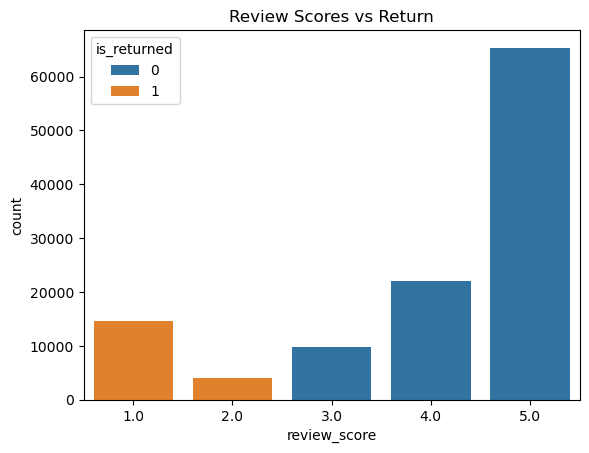

In [52]:
sns.countplot(x='review_score', data=df, hue='is_returned')
plt.title("Review Scores vs Return")
plt.show()


In [53]:
df_encoded = pd.get_dummies(df, columns=['product_category', 'payment_type', 'customer_state'], drop_first=True)


In [54]:
X = df_encoded.drop('is_returned', axis=1)
y = df_encoded['is_returned']


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


ValueError: could not convert string to float: 'a865adb8bec2475e30e835eaf1b9e7d6'

In [57]:
X = df_encoded.drop(['is_returned', 'order_id'], axis=1)


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[19358     0]
 [    0  3764]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19358
           1       1.00      1.00      1.00      3764

    accuracy                           1.00     23122
   macro avg       1.00      1.00      1.00     23122
weighted avg       1.00      1.00      1.00     23122



In [60]:
# Show top features
feature_importance = pd.Series(model.coef_[0], index=X.columns).sort_values(key=abs, ascending=False)
feature_importance.head(10)


review_score                      -12.013431
customer_state_RJ                   0.948418
product_category_bed_bath_table     0.860969
customer_state_DF                   0.676956
customer_state_GO                   0.633105
customer_state_ES                   0.589709
payment_type_voucher               -0.577925
customer_state_SP                   0.565043
customer_state_SC                   0.520177
customer_state_BA                   0.513568
dtype: float64

In [61]:
df['predicted_return'] = model.predict(X)
df.to_csv("return_predictions_ready.csv", index=False)
